<h2 align="center">Online Retail Analysis</h2>

You are given a one year worth of transactions for a UK based retailer. Perform data analysis on this dataset to extract key insights from this dataset using Pandas library

**Dataset Credits**

Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

## Load Data

In [3]:
df = pd.read_excel("Online Retail.xlsx")
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

## Handle Missing Values

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df_descr_null = df[df['Description'].isnull()]
df_descr_null

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [7]:
df[df.StockCode==22139]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,NaN,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [8]:
df[df.StockCode==22139].Description.mode()

0    RETROSPOT TEA SET CERAMIC 11 PC 
Name: Description, dtype: object

In [9]:
for index, row in df_descr_null.iterrows():
    stock_code = row['StockCode']
    # Find the most frequent description for this StockCode
    most_frequent_description = df[df['StockCode'] == stock_code]['Description'].mode()
    if not most_frequent_description.empty:
        df.at[index, 'Description'] = most_frequent_description[0]        

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom


In [12]:
df.dropna(subset=['Description'], inplace=True)
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134968
Country             0
dtype: int64

It is ok to have null values in CustomerID column, we will fix it later on if needed

## Handle Invalid Values

In [13]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


Quantity and UnitPrice has negative values. That is an error. We need to fix it

In [14]:
df[df.Quantity<=0].shape

(10527, 8)

In [15]:
df[df.UnitPrice<=0].shape

(2405, 8)

In [16]:
# Remove negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


We can notice HUGE values in Quantity and UnitPrice both. Let us use quantile to remove those outliers

In [17]:
df.Quantity.quantile(0.9999)

1439.8763999990188

In [18]:
df[df.Quantity>5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [19]:
df.UnitPrice.quantile(0.9999)

1008.7441119982861

In [20]:
df[df.UnitPrice>5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


For now, we are not going to worry about extreme values because these can be legitimate values

## Create New Columns

In [21]:
df = df.copy()
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12


## Data Visualization & Insights

### 1. Plot monthly total sales trend

In [22]:
monthly_sales = df.groupby('Month')['TotalSales'].sum()
monthly_sales

Month
2010-12     823746.140
2011-01     691364.560
2011-02     523631.890
2011-03     717639.360
2011-04     537808.621
2011-05     770536.020
2011-06     761739.900
2011-07     719221.191
2011-08     759138.380
2011-09    1058590.172
2011-10    1154979.300
2011-11    1509496.330
2011-12     638792.680
Freq: M, Name: TotalSales, dtype: float64

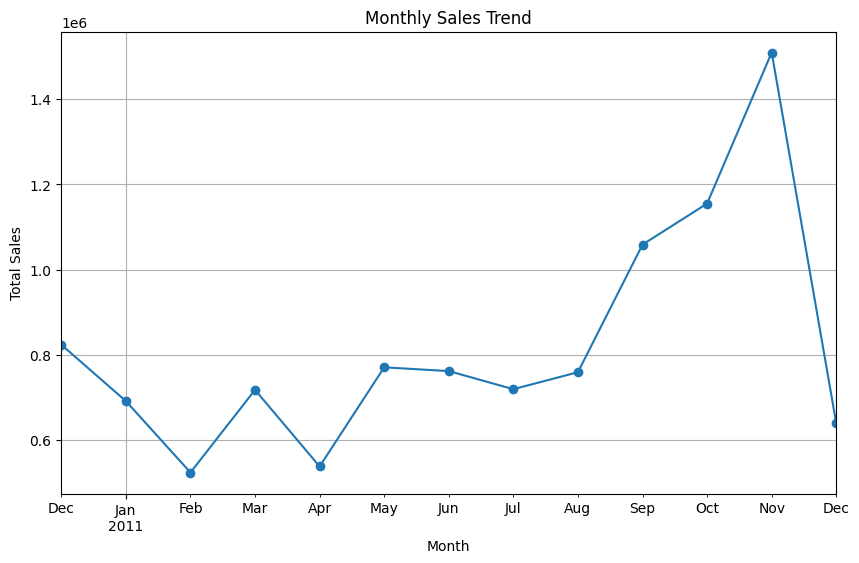

In [23]:
# Plot Sales Over Time
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

**Insights**

Total sales started rising up in August having a peek in November. This is likely due to the holiday season at the end of the year

### 2. Top 5 countries based on total sales

In [24]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [25]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
country_sales[:5]

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalSales, dtype: float64

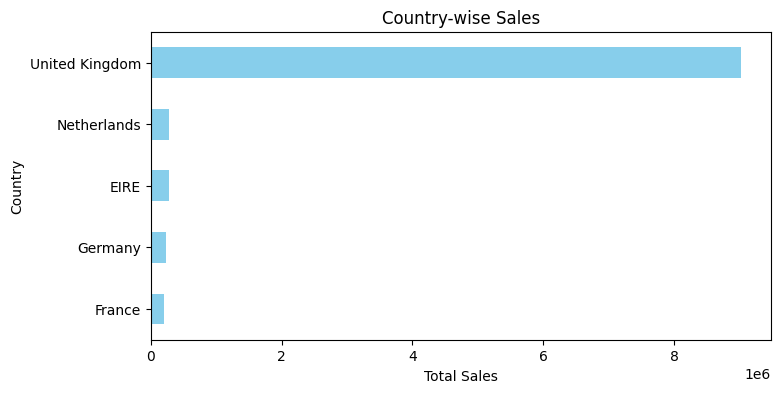

In [26]:
plt.figure(figsize=(8, 4))
country_sales[:5].plot(kind='barh', color='skyblue')
plt.title('Country-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # To show the highest sales at the top
plt.show()

**Insights**

1. UK has the highest sales (around 9 million)
1. Netherlands, EIRE, Germany and France are the next 4 countries each having a sales of more than 2 million

Since these countries cover the major sales revenues, we need to pay special attention to customers in these countries and make sure our product quality and service are the best

### 3. Top 5 products based on total sales

In [27]:
product_sales = df.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False)
product_sales[:5]

StockCode
DOT       206248.77
22423     174484.74
23843     168469.60
85123A    104518.80
47566      99504.33
Name: TotalSales, dtype: float64

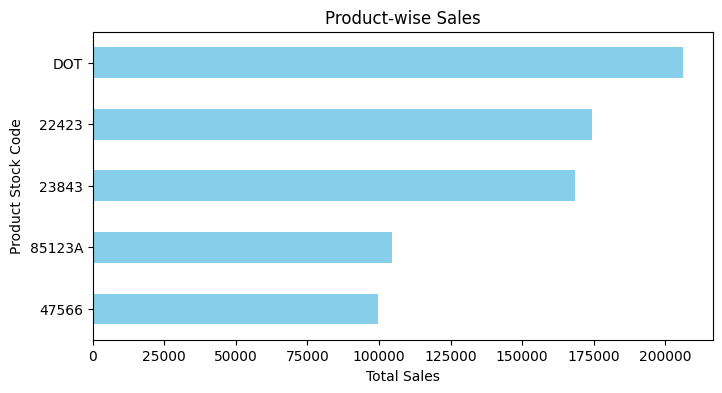

In [28]:
plt.figure(figsize=(8, 4))
product_sales[:5].plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()  # To show the highest sales at the top
plt.show()

In [29]:
df[df.StockCode=="DOT"].Description.mode()[0]

'DOTCOM POSTAGE'

In [30]:
for stock_code in product_sales[:5].index:
    description = df[df.StockCode==stock_code].Description.mode()[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


### 4. RFM Analysis (RFM = Recency, Frequency, Monetary)

In [31]:
current_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalSales': 'sum'    # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [32]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


In [33]:
# Segment Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

In [34]:
# Customers with highest RFM Scores
rfm.sort_values('RFM_Score', ascending=False).sample(5)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
16554.0,42,52,837.10,3,3,3,9
13373.0,61,158,3312.25,2,4,4,10
15105.0,18,101,2298.93,4,4,4,12
14788.0,7,30,679.44,4,2,3,9
17029.0,111,2,716.00,2,1,3,6


### 5. Market Basket Analysis

In [35]:
# Create a basket matrix for association rule mining
basket = df.pivot_table(index='InvoiceNo', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
basket

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


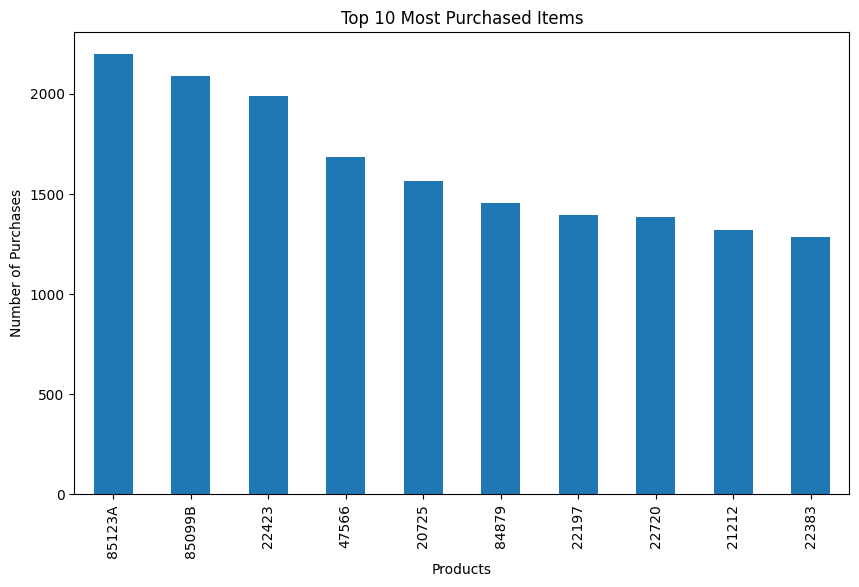

In [36]:
# Convert to 1-hot encoding
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Perform basic visualization of most purchased items
most_purchased_items = basket.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
most_purchased_items.plot(kind='bar')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Products')
plt.ylabel('Number of Purchases')
plt.show()

In [38]:
basket.sample(5)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
544098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559106,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
572045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580373,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
basket.shape

(19960, 3922)

In [53]:
# Taking a small basket running analysis on entire basket takes 13 GB of memory. So taking the first 1000 records just to
# demonstrate how this works
small_basket = basket.head(1000)

In [60]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(small_basket, min_support=0.02, use_colnames=True)
frequent_itemsets

C:\Users\dhava\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.024,(10002)
1,0.023,(16237)
2,0.020,(20668)
3,0.025,(20679)
4,0.046,(20685)
...,...,...
1582,0.020,"(85123A, 21071, 21871, 84029G, 37370)"
1583,0.021,"(85123A, 21071, 84029G, 84029E, 37370)"
1584,0.020,"(22144, 22469, 21479, DOT, 22197)"
1585,0.020,"(85123A, 21871, 84029G, 84029E, 37370)"


In [46]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(20724),(21479),0.038,0.096,0.021,0.552632,5.756579,1.0,0.017352,2.020706,0.858925,0.185841,0.505123,0.385691
1,(21479),(20724),0.096,0.038,0.021,0.218750,5.756579,1.0,0.017352,1.231360,0.914033,0.185841,0.187890,0.385691
2,(20724),(22356),0.038,0.027,0.022,0.578947,21.442495,1.0,0.020974,2.310875,0.991022,0.511628,0.567263,0.696881
3,(22356),(20724),0.027,0.038,0.022,0.814815,21.442495,1.0,0.020974,5.194800,0.979819,0.511628,0.807500,0.696881
4,(20725),(20727),0.059,0.047,0.024,0.406780,8.654886,1.0,0.021227,1.606486,0.939913,0.292683,0.377523,0.458709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4709,(22086),"(22910, 84029G, 22835, 22739)",0.129,0.020,0.020,0.155039,7.751938,1.0,0.017420,1.159817,1.000000,0.155039,0.137795,0.577519
4710,(22835),"(22910, 84029G, 22739, 22086)",0.064,0.020,0.020,0.312500,15.625000,1.0,0.018720,1.425455,1.000000,0.312500,0.298469,0.656250
4711,(22739),"(22910, 84029G, 22835, 22086)",0.046,0.020,0.020,0.434783,21.739130,1.0,0.019080,1.733846,1.000000,0.434783,0.423248,0.717391
4712,(84029G),"(22910, 22835, 22739, 22086)",0.088,0.020,0.020,0.227273,11.363636,1.0,0.018240,1.268235,1.000000,0.227273,0.211503,0.613636


In [47]:
top_rules = rules.sort_values('lift', ascending=False).head(10)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4646,"(DOT, 21479)","(22144, 22469, 22197)",0.020,0.021,0.02,1.000000,47.619048,1.0,0.01958,inf,0.998980,0.952381,1.000000,0.976190
4631,"(22144, 22469, 22197)","(DOT, 21479)",0.021,0.020,0.02,0.952381,47.619048,1.0,0.01958,20.580000,1.000000,0.952381,0.951409,0.976190
4633,"(22144, 22197, 21479)","(DOT, 22469)",0.020,0.022,0.02,1.000000,45.454545,1.0,0.01956,inf,0.997959,0.909091,1.000000,0.954545
4644,"(DOT, 22469)","(22144, 22197, 21479)",0.022,0.020,0.02,0.909091,45.454545,1.0,0.01956,10.780000,1.000000,0.909091,0.907236,0.954545
4706,"(22739, 84029G)","(22910, 22835, 22086)",0.020,0.022,0.02,1.000000,45.454545,1.0,0.01956,inf,0.997959,0.909091,1.000000,0.954545
4691,"(22910, 22835, 22086)","(22739, 84029G)",0.022,0.020,0.02,0.909091,45.454545,1.0,0.01956,10.780000,1.000000,0.909091,0.907236,0.954545
3673,"(DOT, 20725)","(22144, 21935)",0.023,0.020,0.02,0.869565,43.478261,1.0,0.01954,7.513333,1.000000,0.869565,0.866903,0.934783
3672,"(22144, 21935)","(DOT, 20725)",0.020,0.023,0.02,1.000000,43.478261,1.0,0.01954,inf,0.996939,0.869565,1.000000,0.934783
4692,"(84029G, 22739, 22086)","(22835, 22910)",0.020,0.024,0.02,1.000000,41.666667,1.0,0.01952,inf,0.995918,0.833333,1.000000,0.916667
3675,"(20725, 21935)","(22144, DOT)",0.020,0.024,0.02,1.000000,41.666667,1.0,0.01952,inf,0.995918,0.833333,1.000000,0.916667


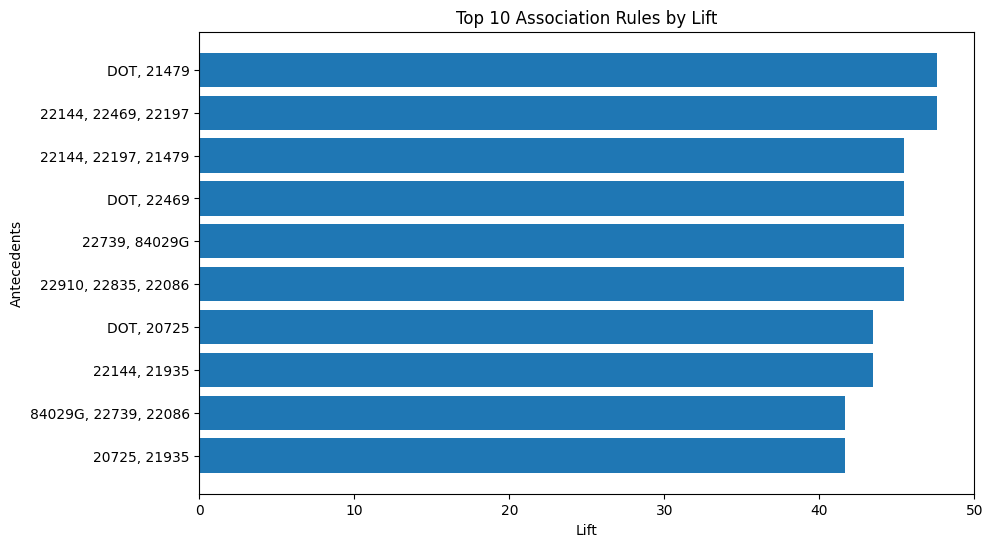

In [49]:
plt.figure(figsize=(10, 6))
plt.barh(top_rules['antecedents'].apply(lambda x: ', '.join(map(str, list(x)))), top_rules['lift'])
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()